In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display, Markdown

In [1]:
#Start of Chapter 8 Stories
#Story 1: (Two-Sample t-Test): Evaluating the Effectiveness of a New Diet Plan

In this story, a nutritionist has collected data on 25 participants in two different groups about their weight loss following two different diets.  One follows a new diet plan and the other follows their old diet plan.  The nutritionist hypothesizes that weight loss will differ significantly between the two groups (alternate hypothesis).  Therefore, the null hypothesis would be μ A = μ B, and the alternate hypothesis would be μ A ≠ μ B.

Mean (Group A - New Diet): 3.42, Mean (Group B - Traditional Diet): 2.36
T-statistic: 7.9782, Degrees of Freedom: 47.95
Two-tailed p-value: 0.0000



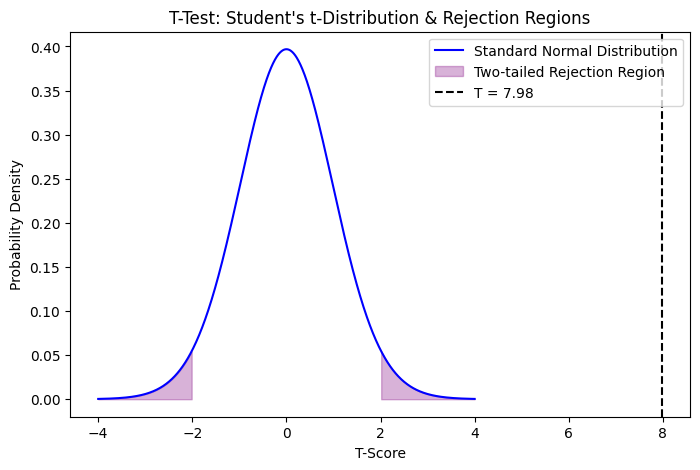

'Two-Tailed Test Conclusion:'

'Reject the null hypothesis: There is a significant difference in weight loss between the two diets.'

In [20]:
#Sets the seed for reproducibility
np.random.seed(42)

#Generates random weight loss data
group_A = np.random.normal(loc=3.5, scale=0.5, size=25)  # New diet plan
group_B = np.random.normal(loc=2.5, scale=0.5, size=25)  # Traditional diet plan

#Calculates the sample means and standard deviations
mean_A, mean_B = np.mean(group_A), np.mean(group_B)
std_A, std_B = np.std(group_A, ddof=1), np.std(group_B, ddof=1)  # Sample std dev

#Calculates the standard error of the difference
n_A, n_B = len(group_A), len(group_B)
se_diff = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

#Calculates the t-statistic
t_stat = (mean_A - mean_B) / se_diff

#Calculates the degrees of freedom
df = ((std_A**2 / n_A + std_B**2 / n_B) ** 2) / \
     (((std_A**2 / n_A) ** 2) / (n_A - 1) + ((std_B**2 / n_B) ** 2) / (n_B - 1))

#Calculates the p-values
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))  #Two-tailed test

#Significance level
alpha = 0.05

#Defines the conclusion statements for the two-tailed test
two_tailed_conclusion = (
    "Reject the null hypothesis: There is a significant difference in weight loss between the two diets."
    if p_value_two_tailed < alpha else
    "Fail to reject the null hypothesis: No significant difference in weight loss between the two diets."
)

#Prints results and conclusions
print(f"Mean (Group A - New Diet): {mean_A:.2f}, Mean (Group B - Traditional Diet): {mean_B:.2f}")
print(f"T-statistic: {t_stat:.4f}, Degrees of Freedom: {df:.2f}")
print(f"Two-tailed p-value: {p_value_two_tailed:.4f}\n")

#Creates the plot
x = np.linspace(-4, 4, 1000)  #X-axis range
y = stats.t.pdf(x, df)  #Y-axis range

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

#Calculates the critical t-values
t_critical_two_tailed = stats.t.ppf(1 - alpha / 2, df)  #Two-tailed critical value

#Shades the rejection regions
plt.fill_between(x, y, where=(x >= t_critical_two_tailed), color="purple", alpha=0.3, label="Two-tailed Rejection Region")
plt.fill_between(x, y, where=(x <= -t_critical_two_tailed), color="purple", alpha=0.3)

#Plots the calculated t-statistic
plt.axvline(t_stat, color="black", linestyle="--", label=f"T = {t_stat:.2f}")

#Labels the plot's characteristics
plt.title("T-Test: Student's t-Distribution & Rejection Regions")
plt.xlabel("T-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

display("Two-Tailed Test Conclusion:", two_tailed_conclusion)

In [1]:
#Story 2: (Two-Sample z-Test): Evaluating the Effectiveness of a New Training Program

In this story, a company wants to determine whether a newly implemented productivity training program significantly increases employees’ daily task completion compared to the standard training method.  The HR Department selected two groups of 50 employees who were randomly selected.  One group completed the new productivity training program, and the other completed the old program.  The HR Department wants to figure out if the new program leads to a higher average number of tasks completed per day.  In this case, the HR Department's hypothesis (alternate hypothesis) would be μ A > μ B.  The null hypothesis would be μ A < μ B.

Z-statistic: 3.0000
One-tailed p-value: 0.0013
Critical z-value: 1.6449


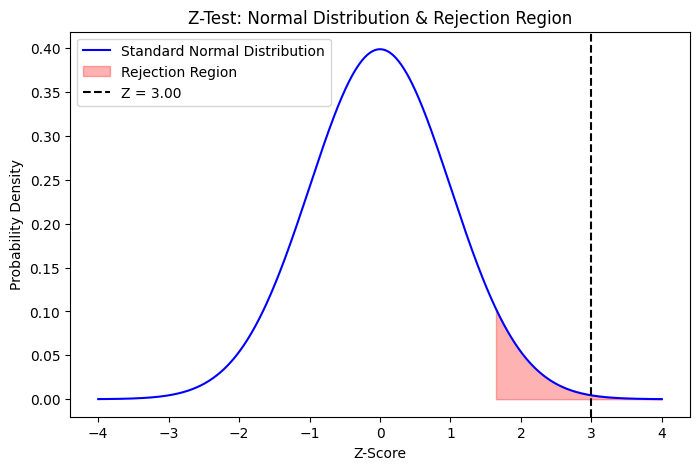

'One-tailed test conclusion:'

'Reject the null hypothesis: The new training program significantly increases productivity.'

In [8]:
#Defines the data
mean_A, std_A, n_A = 28, 5, 50  #Group A (New training program)
mean_B, std_B, n_B = 25, 5, 50  #Group B (Traditional training)

#Calculates the standard error of the difference
se_diff = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

#Calculates the z-statistic
z_stat = (mean_A - mean_B) / se_diff

#Calculates the one-tailed p-value (Testing if mean_A > mean_B)
p_value = 1 - stats.norm.cdf(z_stat)

#Significance level
alpha = 0.05

#Calculates the critical z-value for one-tailed test
z_critical = stats.norm.ppf(1 - alpha)

#Conclusion
conclusion = (
    "Reject the null hypothesis: The new training program significantly increases productivity."
    if p_value < alpha else
    "Fail to reject the null hypothesis: No significant evidence that the new training improves productivity."
)

#Prints the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")
print(f"Critical z-value: {z_critical:.4f}")

#Creates the plot
x = np.linspace(-4, 4, 1000)  #X-axis range
y = stats.norm.pdf(x)  #Y-axis range

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

#Shades the rejection region
plt.fill_between(x, y, where=(x >= z_critical), color="red", alpha=0.3, label="Rejection Region")

#Plots the calculated z-statistic
plt.axvline(z_stat, color="black", linestyle="--", label=f"Z = {z_stat:.2f}")

#Labels the plot's characteristics
plt.title("Z-Test: Normal Distribution & Rejection Region")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

display("One-tailed test conclusion:", conclusion)

In [9]:
#Start of Chapter 10 Stories
#Story 2: (One-Way ANOVA): Evaluating the Effectiveness of Diet Programs

In this story, a researcher wants to test the effect of three different diets and how they affect weight loss.  The researcher randomly assigns 15 participants to each group, ensuring each group is equivalent in age and initial weight.  The data is recorded a month after the trial started.  Since the researcher hypothesizes that the mean weight loss is significant between the three groups, we can conclude that their alternative hypothesis must be μ A, μ B, or μ C are different from the other averages.  The null hypothesis would, therefore, be μ A = μ B = μ C.

F-statistic: 100.4945
p-value: 0.0000


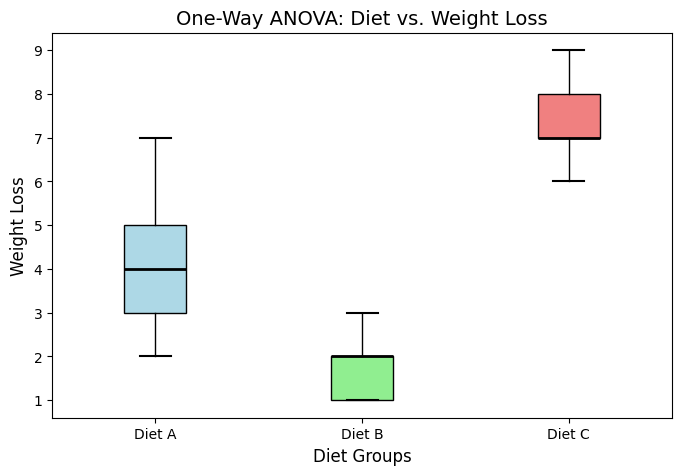

'Conclusion: Reject the null hypothesis. There is a significant difference in weight loss among the diets.'

In [22]:
# Weight loss data for each diet
diet_A = [3, 4, 5, 2, 3, 4, 6, 7, 5, 4, 3, 6, 5, 4, 3]
diet_B = [1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2]
diet_C = [6, 7, 8, 7, 6, 8, 9, 8, 7, 9, 8, 7, 6, 7, 8]

# Perform one-way ANOVA
F_stat, p_value = stats.f_oneway(diet_A, diet_B, diet_C)

# Output results
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Improved Boxplot for One-Way ANOVA
plt.figure(figsize=(8, 5))

# Define box colors
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create boxplot with colors
box = plt.boxplot([diet_A, diet_B, diet_C], tick_labels=["Diet A", "Diet B", "Diet C"], patch_artist=True)

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)

# Customize median and cap colors
for median in box['medians']:
    median.set(color='black', linewidth=2)
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)

# Title and labels
plt.title("One-Way ANOVA: Diet vs. Weight Loss", fontsize=14)
plt.ylabel("Weight Loss", fontsize=12)
plt.xlabel("Diet Groups", fontsize=12)

# Remove background grid
plt.grid(False)

plt.show()

#Displays the result
if p_value < 0.05:
    display("Conclusion: Reject the null hypothesis. There is a significant difference in weight loss among the diets.")
else:
    display("Conclusion: Fail to reject the null hypothesis. No significant difference in weight loss among the diets.")

In [2]:
#Story 4: (Two-Way ANOVA): Evaluating the Performance of Students

In this story, a study is being conducted to examine the effect of different teaching methods and study time on a group of 20 students.  Method A and Method B both are split up between 2 hours and 4 hours of study time.  There are several null and alternative hypotheses we can draw from this because there are three factors to consider here.  The first is the grades reflected by teaching method.  For this, the null hypothesis would be Method A and Method B do not have any effect on exam scores.  The alternative hypothesis would be that Method A and Method B do significantly affect exam scores.  The next factor to consider is time spent studying.  For this the null hypothesis would be that study time has no effect on exam scores.  The alternative hypothesis is that time spent studying does significantly affect exam scores.  And finally, the last set of hypotheses to consider are related to the correlation between the methods used and the time students spend studying.  The null hypothesis would be that there is no correlation between the teaching method and study hours that affects exam scores and the althernative hypothesis is that the teaching method used and the time spent studying do significantly affect exam scores and that there is a correlation.

Normality Test (Shapiro-Wilk):
Group ('A', '2 Hours'): W = 0.9769, p = 0.8889
Group ('A', '4 Hours'): W = 0.9339, p = 0.1836
Group ('B', '2 Hours'): W = 0.9664, p = 0.6775
Group ('B', '4 Hours'): W = 0.9720, p = 0.7962

Levene’s Test: Stat = 1.0747, p = 0.3649

Two-Way ANOVA Results:
                         sum_sq    df            F        PR(>F)
C(Method)                 768.8   1.0   121.574698  1.973601e-17
C(Study_Time)            8736.2   1.0  1381.504786  1.679441e-50
C(Method):C(Study_Time)   135.2   1.0    21.379942  1.515110e-05
Residual                  480.6  76.0          NaN           NaN


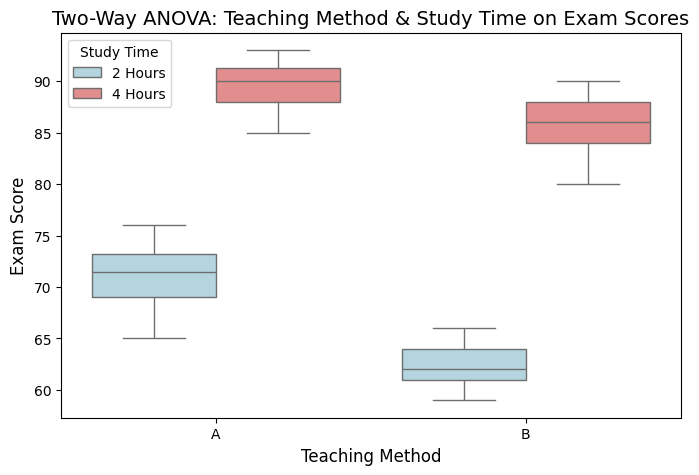

In [3]:
#Defines the exam score data
method_A_2h = [65, 68, 72, 74, 69, 71, 73, 70, 72, 74, 67, 68, 71, 75, 76, 73, 72, 70, 69, 74]
method_A_4h = [85, 88, 92, 90, 87, 89, 91, 92, 93, 90, 88, 85, 91, 92, 90, 89, 86, 91, 92, 88]
method_B_2h = [60, 63, 64, 62, 61, 60, 59, 62, 65, 64, 66, 63, 61, 60, 62, 61, 63, 65, 64, 62]
method_B_4h = [80, 83, 85, 84, 82, 86, 88, 90, 87, 85, 83, 84, 86, 89, 88, 90, 85, 87, 86, 89]

#Creates a dataframe
data = pd.DataFrame({
    "Exam_Score": method_A_2h + method_A_4h + method_B_2h + method_B_4h,
    "Method": ["A"] * 40 + ["B"] * 40,
    "Study_Time": ["2 Hours"] * 20 + ["4 Hours"] * 20 + ["2 Hours"] * 20 + ["4 Hours"] * 20
})

#Checks assumptions
#1. Normality (Shapiro-Wilk Test)
print("Normality Test (Shapiro-Wilk):")
for group in data.groupby(["Method", "Study_Time"]):
    stat, p = stats.shapiro(group[1]["Exam_Score"])
    print(f"Group {group[0]}: W = {stat:.4f}, p = {p:.4f}")

#2. Homogeneity of Variance (Levene’s Test)
levene_stat, levene_p = stats.levene(
    method_A_2h, method_A_4h, method_B_2h, method_B_4h
)
print(f"\nLevene’s Test: Stat = {levene_stat:.4f}, p = {levene_p:.4f}")

# Two-Way ANOVA
model = ols("Exam_Score ~ C(Method) * C(Study_Time)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA Results:")
print(anova_table)

plt.figure(figsize=(8, 5))
sns.boxplot(x="Method", y="Exam_Score", hue="Study_Time", data=data, palette=["lightblue", "lightcoral"])

plt.title("Two-Way ANOVA: Teaching Method & Study Time on Exam Scores", fontsize=14)
plt.xlabel("Teaching Method", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.legend(title="Study Time")
plt.grid(False)

plt.show()

From these results, we can seee that the p values from both group A and B with 2 and 4 hours of study time are more than 0.05, we cannot reject the null hypotheses for this.  The affect of study time, teaching method, and the interactibility between the two factors is not significant enough.